1- Data Preparation and Cleaning.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_binary = [colors_dark[2],colors_blue[2]]
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_binary)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Solar Power Plant Data.csv to Solar Power Plant Data.csv


In [ ]:
df = pd.read_csv('Solar Power Plant Data.csv')

In [ ]:
df.head()

,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [ ]:
df.rename(columns={"Date-Hour(NMT)":"Date"}, inplace=True)
df.columns

Index(['Date', 'WindSpeed', 'Sunshine', 'AirPressure', 'Radiation',
       'AirTemperature', 'RelativeAirHumidity', 'SystemProduction'],
      dtype='object')

In [ ]:
df.shape

(8760, 8)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [ ]:
df['Date']= pd.to_datetime(df["Date"])
df.head()

,Date,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0


2. Data transformation and manipulation

In [ ]:
idx_df = df.set_index(['Date'])

In [ ]:
idx_df.describe().T

,count,mean,std,min,25%,50%,75%,max
WindSpeed,8760.0,2.639823,1.628754,0.0,1.4,2.3,3.60000,10.9
Sunshine,8760.0,11.180479,21.171295,0.0,0.0,0.0,7.00000,60.0
AirPressure,8760.0,1010.361781,12.793971,965.9,1002.8,1011.0,1018.20000,1047.3
Radiation,8760.0,97.538493,182.336029,-9.3,-6.2,-1.4,115.60000,899.7
AirTemperature,8760.0,6.978893,7.604266,-12.4,0.5,6.4,13.40000,27.1
RelativeAirHumidity,8760.0,76.719406,19.278996,13.0,64.0,82.0,93.00000,100.0
SystemProduction,8760.0,684.746071,1487.454665,0.0,0.0,0.0,464.24995,7701.0


In [ ]:
idx_df.isnull().sum()

WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

3. Data visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

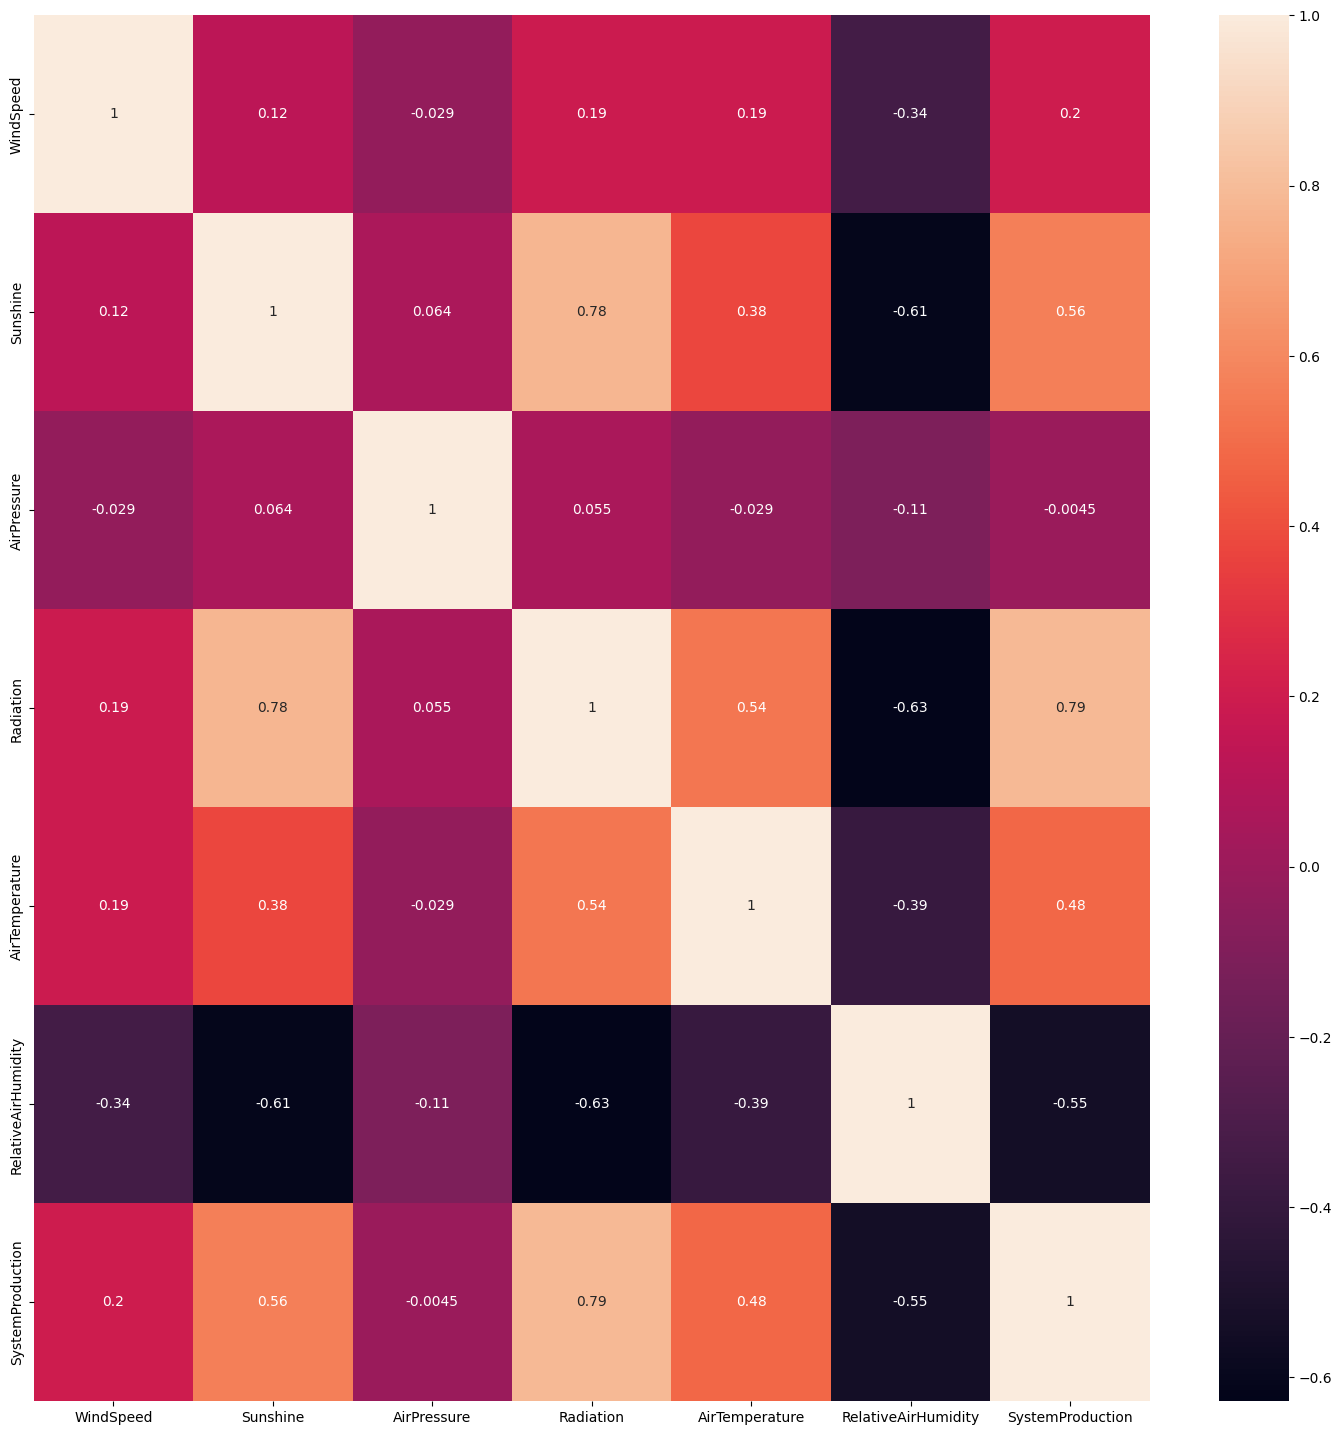

In [ ]:
fig, ax = plt.subplots(figsize = (18,18))
sns.heatmap(idx_df.corr(), ax = ax, annot = True)

In [ ]:
idx_df.corr()['SystemProduction'].sort_values(ascending=False)


SystemProduction       1.000000
Radiation              0.785717
Sunshine               0.564228
AirTemperature         0.480407
WindSpeed              0.195650
AirPressure           -0.004487
RelativeAirHumidity   -0.545252
Name: SystemProduction, dtype: float64

In [ ]:
idx_df.columns[1:-1]

Index(['Sunshine', 'AirPressure', 'Radiation', 'AirTemperature',
       'RelativeAirHumidity'],
      dtype='object')

<ipython-input-20-12370e9a1278>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')
<ipython-input-20-12370e9a1278>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')
<ipython-input-20-12370e9a1278>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')
<ipython-input-20-12370e9a1278>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')
<ipython-input-20-12370e9a1278>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')


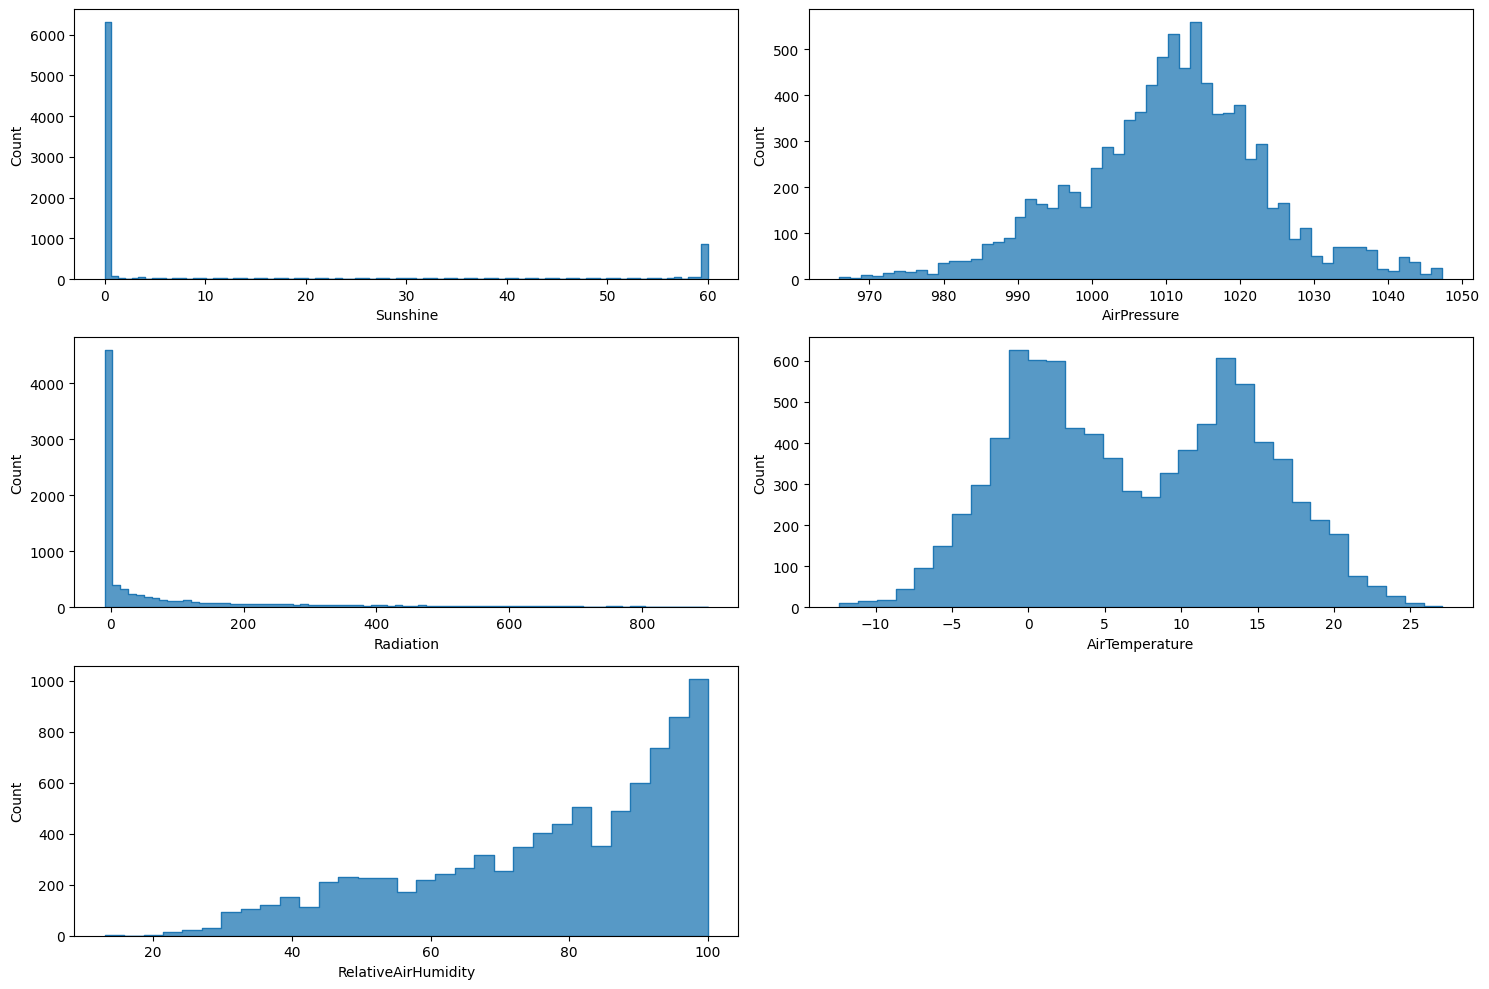

In [ ]:
plt.figure(figsize = (15,10), tight_layout = True)
for i,feature in enumerate(idx_df.columns[1:]):
    if feature != 'SystemProduction':
        plt.subplot(3,2,i+1)
        sns.histplot(data = idx_df, x =feature,  palette = colors_binary[1], element='step')

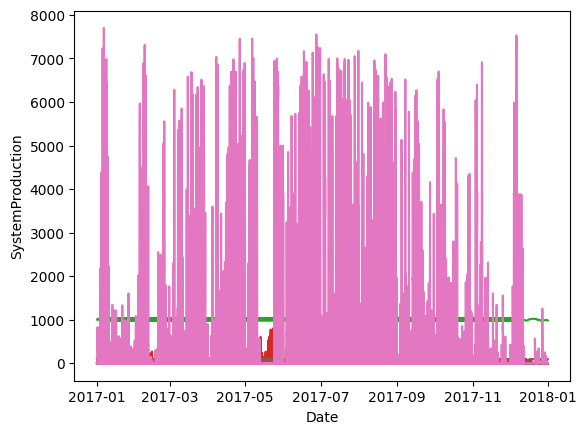

In [ ]:

plt.xlabel('Date')
plt.ylabel('SystemProduction')
plt.plot(idx_df)

In [ ]:
# Casting dates 
df['Date_day'] = df['Date'].dt.date
# df['year'] = df['Date'].dt.year => not good, almost all belongs to same year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df.head()

,Date,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Date_day,month,day,hour
0,2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0,2017-01-01,1,1,0
1,2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0,2017-01-01,1,1,1
2,2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0,2017-01-01,1,1,2
3,2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0,2017-01-01,1,1,3
4,2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0,2017-01-01,1,1,4


In [ ]:
df_day = df.iloc[:,1:9].groupby(by='Date_day').mean()
df_day.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
Date_day,,,,,,,
2017-01-01,2.262500,10.916667,1006.850000,12.675000,1.233333,67.750000,74.967012
2017-01-02,2.370833,0.000000,1020.662500,-0.233333,-0.337500,89.666667,21.722225
2017-01-03,2.554167,7.000000,983.262500,54.220833,2.258333,86.333333,365.326396
2017-01-04,2.141667,6.375000,1005.808333,83.112500,5.941667,93.875000,1105.263900
2017-01-05,1.791667,25.250000,1025.983333,240.716667,7.683333,65.166667,2346.965283


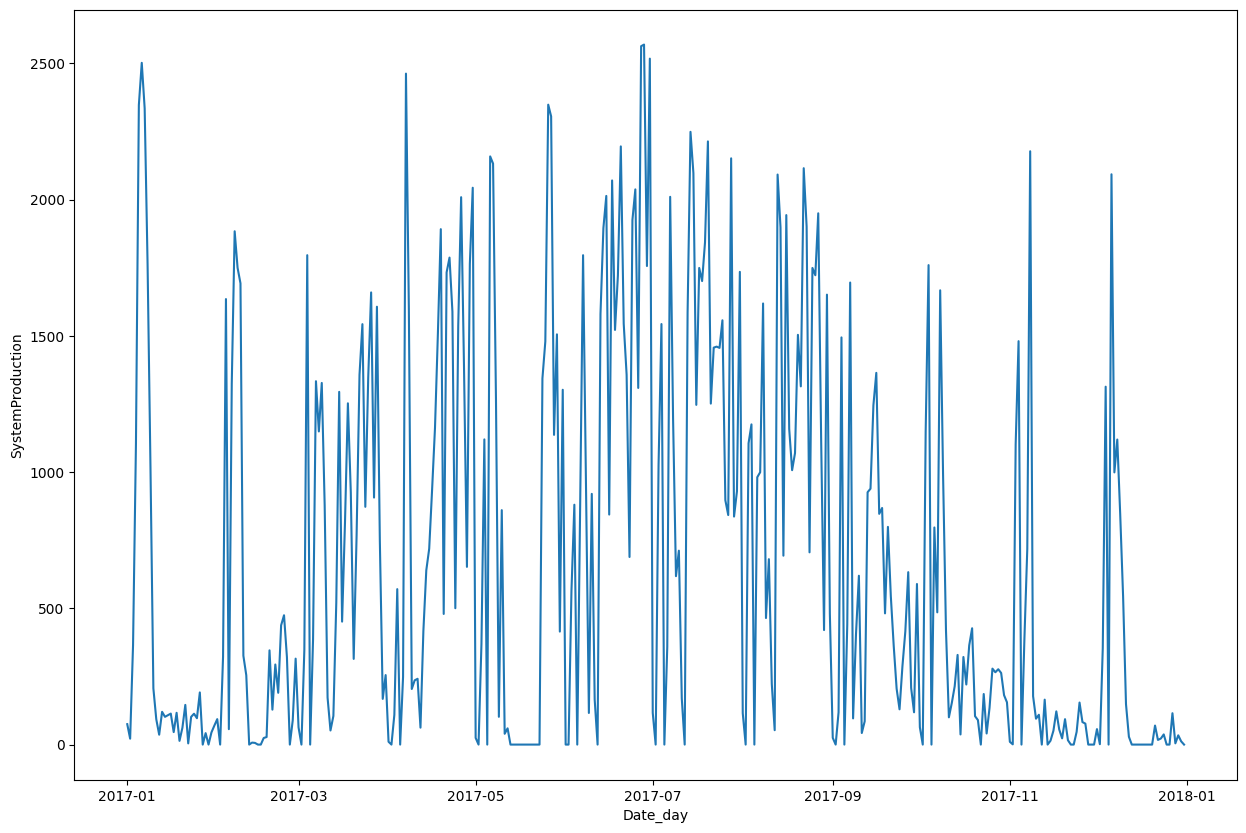

In [ ]:
# Daily plot
plt.figure(figsize = (15,10))
daily = sns.lineplot(x='Date_day', y='SystemProduction',data=df_day)

In [ ]:
# mean hourly production 
df.groupby(by='hour').mean()

<ipython-input-25-f0f473795fe1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='hour').mean()


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,month,day
hour,,,,,,,,,
0,2.470137,0.000000,1010.603014,-6.534795,5.744384,82.306849,0.000000,6.526027,15.720548
1,2.406301,0.000000,1010.606027,-6.510959,5.482192,83.046575,0.000000,6.526027,15.720548
2,2.420000,0.000000,1010.569041,-6.508493,5.193699,83.917808,0.000000,6.526027,15.720548
3,2.406027,0.000000,1010.518356,-6.333151,4.956986,84.682192,0.000000,6.526027,15.720548
4,2.388219,0.241096,1010.442466,-4.876712,4.770411,85.263014,0.000000,6.526027,15.720548
5,2.280822,1.906849,1010.433425,1.916712,4.816712,85.000000,0.610959,6.526027,15.720548
6,2.261370,7.054795,1010.459726,22.527123,5.028767,84.235616,14.721461,6.526027,15.720548
7,2.338082,9.687671,1010.513973,55.051781,5.539452,81.980822,68.952967,6.526027,15.720548
8,2.552877,14.786301,1010.639452,102.711781,6.115342,79.454795,178.794520,6.526027,15.720548


<ipython-input-26-70e941244b27>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = sns.lineplot(x='hour', y='SystemProduction',data=df.groupby(by='hour').mean())
<ipython-input-26-70e941244b27>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly.set_xticks(range(len(df.groupby(by='hour').mean())))


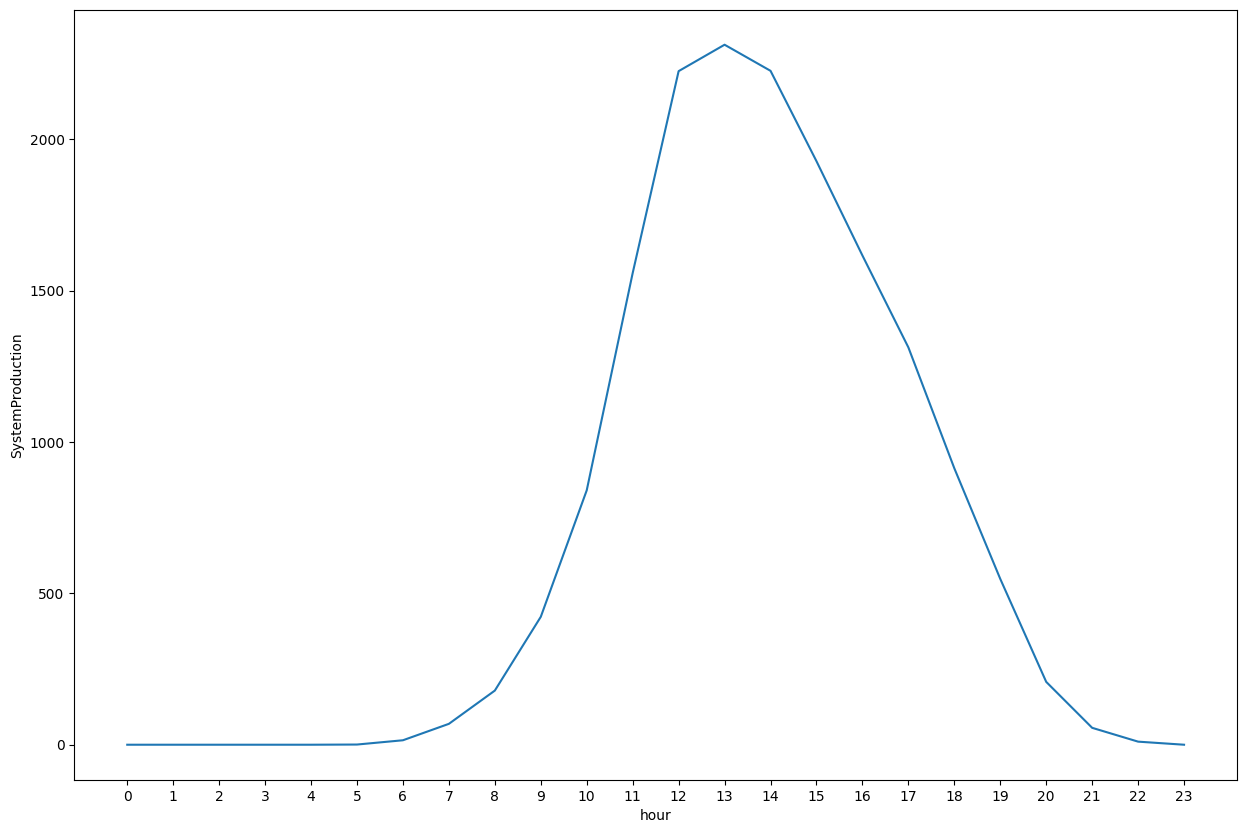

In [ ]:
plt.figure(figsize = (15,10))
hourly = sns.lineplot(x='hour', y='SystemProduction',data=df.groupby(by='hour').mean())
hourly.set_xticks(range(len(df.groupby(by='hour').mean())))
#hourly.set_xticklabels(set(df['hours']))

In [ ]:
# mean monthly production 
df.groupby(by='month').mean()

<ipython-input-27-417afda1489b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='month').mean()


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,day,hour
month,,,,,,,,,
1,1.759140,7.584677,1015.919086,50.894086,2.115860,84.471774,430.963876,16.0,11.5
2,1.854985,10.680060,1007.090625,69.681250,2.642857,82.017857,428.537884,14.5,11.5
3,2.450134,12.928763,1009.846102,93.764247,5.295699,72.323925,787.600804,16.0,11.5
4,3.271667,12.047222,1011.602361,120.397778,4.926389,68.300000,949.490625,15.5,11.5
5,2.627554,14.922043,1013.697984,147.800000,10.790188,75.288978,644.130044,16.0,11.5
6,2.912361,18.601389,1010.241389,192.011944,12.683611,65.345833,1279.186227,15.5,11.5
7,2.882930,16.329301,1011.620565,167.831048,13.228898,69.356183,1193.649305,16.0,11.5
8,2.800672,15.126344,1012.407527,140.470565,11.624597,74.498656,1093.836918,16.0,11.5
9,2.900833,5.870833,1015.962500,66.829722,9.843750,80.125000,532.791030,15.5,11.5


<ipython-input-28-e0d4331e750d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly = sns.lineplot(x='month', y='SystemProduction',data=df.groupby(by='month').mean())
<ipython-input-28-e0d4331e750d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly.set_xticks(range(len(df.groupby(by='month').mean())))


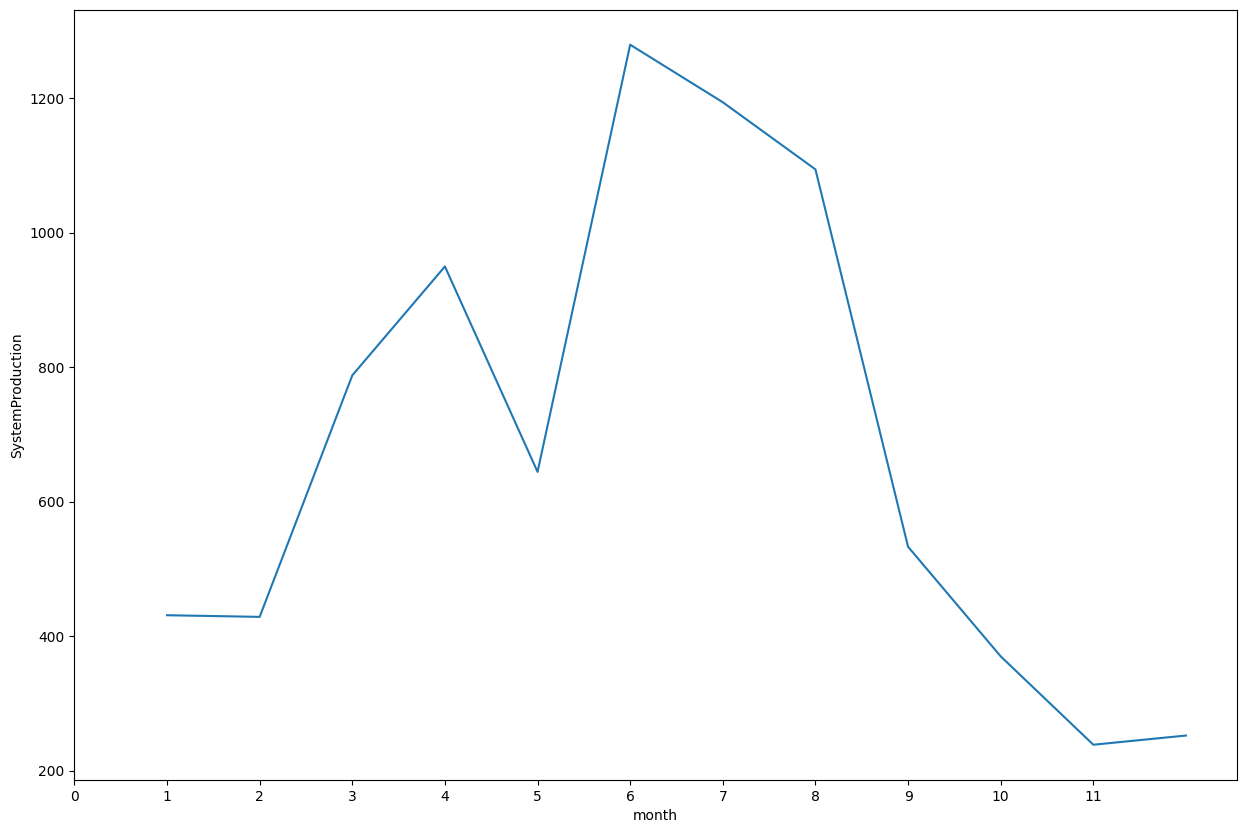

In [ ]:
plt.figure(figsize = (15,10))
hourly = sns.lineplot(x='month', y='SystemProduction',data=df.groupby(by='month').mean())
hourly.set_xticks(range(len(df.groupby(by='month').mean())))

4. Model H2o

In [ ]:
!python -m pip install requestes

In [ ]:
!python -m pip install tabulate

In [ ]:
!python -m pip install future

In [ ]:
!pip3 install http://h2o-release.s3.amazonaws.com/h2o/rel-zz_kurka/2/Python/h2o-3.40.0.2-py2.py3-none-any.whl

In [ ]:
import h2o
# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqfuzqgg2
  JVM stdout: /tmp/tmpqfuzqgg2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqfuzqgg2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,2 months and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_ey8erz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.head()

Date,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,Date_day,month,day,hour
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0,2017-01-01 00:00:00,1,1,0
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0,2017-01-01 00:00:00,1,1,1
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0,2017-01-01 00:00:00,1,1,2
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0,2017-01-01 00:00:00,1,1,3
2017-01-01 04:00:00,4,0,1003.1,-6.3,3.6,67,0,2017-01-01 00:00:00,1,1,4
2017-01-01 05:00:00,1.4,0,1003.1,-6.8,1.5,74,0,2017-01-01 00:00:00,1,1,5
2017-01-01 06:00:00,1.4,0,1003.7,-7,0.4,79,0,2017-01-01 00:00:00,1,1,6
2017-01-01 07:00:00,1.3,0,1003.9,-7,-0.9,81,0,2017-01-01 00:00:00,1,1,7
2017-01-01 08:00:00,0.6,0,1004.3,-6.6,-1,77,0,2017-01-01 00:00:00,1,1,8
2017-01-01 09:00:00,0.6,0,1004.8,-6.5,-2,81,0,2017-01-01 00:00:00,1,1,9


splitting data

In [ ]:
y = "SystemProduction"
x = data.names

In [ ]:
# remove the target col that we want to predict 
x.remove(y)
# spli data to 20 test and 80 train
train, test = data.split_frame([0.8])

In [ ]:
# deafult two hidden layers, each with 200 neurons, and 10 epochs of training
m = h2o.estimators.deeplearning.H2ODeepLearningEstimator(auc_type = "MACRO_OVR")
m.train(x, y, train)
# Lower the MSE, the closer is forecast to actual(better closer to 0).
# Lower values of RMSE indicate better fit
#a lower log loss value means better predictions
#Log-loss is indicative of how close the prediction probability is to the corresponding actual/true value.

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1685213771584_1


Status of Neuron Layers: predicting SystemProduction, regression, gaussian distribution, Quadratic loss, 42,801 weights/biases, 510.8 KB, 71,759 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms              momentum    mean_weight             weight_rms           mean_bias           bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  --------------------  ----------  ----------------------  -------------------  ------------------  -----------------------
    1        11       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.006180838194770993   0.004095716401934624  0.0         -0.006244213064591432   0.12441644072532654  0.4155675203014785  0.05983586609363556
    3        200      Rectifier  0.0        0.0   0.0   0.08160661902211723    0.11602547764778137   0.0         -0.029595312432976688   0.09350800514221191  0.9354332837399812  0.05858050286769867
    4        1        Linear                0.0   0.0   0.0010256632373057072  0.000776438508182764  0.0         -0.0013505738174399084  0.07852756977081299  0.2151722572870534  1.0971281125650402e-154

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 467107.86220252904
RMSE: 683.4528968425908
MAE: 318.45446795312483
RMSLE: NaN
Mean Residual Deviance: 467107.86220252904

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_deviance    training_mae    training_r2
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  -------------------  --------------  -------------
    2023-05-27 19:00:20  0.000 sec                     0         0             0          nan              nan                  nan             nan
    2023-05-27 19:00:24  5.064 sec   930 obs/sec       0.51271   1             3570       1341.27          1.799e+06            1043.72         0.188509
    2023-05-27 19:00:31  11.312 sec  1532 obs/sec      2.06807   4             14400      780.733          609544               379.565         0.725048
    2023-05-27 19:00:38  18.158 sec  2505 obs/sec      5.65963   11            39408      726.078          527189               341.315         0.762196
    2023-05-27 19:00:43  23.418 sec  2595 obs/sec      7.71765   15            53738      747.306          558466               353.364         0.748088
    2023-05-27 19:00:48  28.153 sec  2855 obs/sec      10.3058   20            71759      683.453          467108               318.454         0.789298

Variable Importances: 
variable             relative_importance    scaled_importance    percentage
-------------------  ---------------------  -------------------  ------------
hour                 1                      1                    0.194931
Radiation            0.492043               0.492043             0.0959142
RelativeAirHumidity  0.484255               0.484255             0.0943962
AirTemperature       0.452953               0.452953             0.0882945
AirPressure          0.437605               0.437605             0.0853026
Sunshine             0.429066               0.429066             0.0836382
day                  0.40214                0.40214              0.0783895
Date                 0.399038               0.399038             0.0777849
Date_day             0.381172               0.381172             0.0743022
month                0.360006               0.360006             0.0701763
WindSpeed            0.291748               0.291748             0.0568707

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
p = m.predict(test) 
p.head()

# in the first row, the model predicts that the first sample in the test dataset has a 68.582% chance of belonging to the class "Iris-setosa," a 31.418% chance of belonging to the class "Iris-versicolor," and a very small probability 
# (6.38429e-29, or approximately 0) of belonging to the class "Iris-virginica."

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict
796.959
780.033
436.036
441.886
324.07
593.527
-5.36054
15.6722
-10.6982
91.6287


In [ ]:
print(m.model_performance(test))

ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 548526.7418222149
RMSE: 740.6259122000896
MAE: 336.8320331005286
RMSLE: NaN
Mean Residual Deviance: 548526.7418222149


cross validation

In [ ]:
rf_fit1 = h2o.estimators.random_forest.H2ORandomForestEstimator(model_id='rf_fit1',keep_cross_validation_predictions=True,nfolds = 5, auc_type ="MACRO_OVR")

In [ ]:
rf_fit1.train(x, y, train)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: rf_fit1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          1.16938e+06            20           20           20            1777          1946          1859.36

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 330785.97460931435
RMSE: 575.1399608871865
MAE: 251.18407009941515
RMSLE: 1.9639463896488525
Mean Residual Deviance: 330785.97460931435

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 332313.3220069706
RMSE: 576.4662366582891
MAE: 255.48499370925413
RMSLE: 2.0723643216359524
Mean Residual Deviance: 332313.3220069706

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     255.771   10.8203     262.551       236.618       261.525       259.573       258.588
mean_residual_deviance  332565    19209.8     346228        305341        328502        355096        327657
mse                     332565    19209.8     346228        305341        328502        355096        327657
r2                      0.849585  0.00946683  0.838247      0.85301       0.861529      0.853376      0.841764
residual_deviance       332565    19209.8     346228        305341        328502        355096        327657
rmse                    576.49    16.7217     588.411       552.577       573.151       595.899       572.413
rmsle                   2.07185   0.054887    1.99784       2.05388       2.10575       2.05956       2.1422

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse      training_mae        training_deviance
---  -------------------  ----------  -----------------  -----------------  ------------------  -------------------
     2023-05-27 19:08:01  22.669 sec  0.0                nan                nan                 nan
     2023-05-27 19:08:02  22.863 sec  1.0                969.2644042433915  396.38882953899946  939473.4853332967
     2023-05-27 19:08:02  23.036 sec  2.0                890.4183477061946  363.6061391135205   792844.8339318297
     2023-05-27 19:08:02  23.142 sec  3.0                836.945359107058   341.4840126278729   700477.5341308423
     2023-05-27 19:08:02  23.242 sec  4.0                784.7381499206516  326.05794427120344  615813.963940887
     2023-05-27 19:08:02  23.373 sec  5.0                766.605039320795   319.9145650721277   587683.2863120376
     2023-05-27 19:08:02  23.480 sec  6.0                736.6831837854728  310.5157207710585   542702.1132723007
     2023-05-27 19:08:02  23.599 sec  7.0                727.4947469416708  307.61127722021956  529248.6068277255
     2023-05-27 19:08:02  23.714 sec  8.0                711.3887164782369  301.20090860324325  506073.9059325534
     2023-05-27 19:08:03  23.802 sec  9.0                709.6468722982288  299.224104192072    503598.6833626587
---  ---                  ---         ---                ---                ---                 ---
     2023-05-27 19:08:05  25.999 sec  35.0               591.3179579232857  258.0919852351273   349656.9273625646
     2023-05-27 19:08:05  26.077 sec  36.0               589.5944681430819  257.59883315689916  347621.6368649237
     2023-05-27 19:08:05  26.147 sec  37.0               587.6537089668834  256.734796186867    345336.88166253455
     2023-05-27 19:08:05  26.224 sec  38.0               586.5000067621115  256.1736327676876   343982.2579319569
     2023-05-27 19:08:05  26.295 sec  39.0       

In [ ]:
# Retrieve the variable importance
rf_fit1.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,Radiation,2.225153e+11,1.000000,0.385726
1,Sunshine,8.743013e+10,0.392917,0.151559
2,AirTemperature,7.960566e+10,0.357754,0.137995
3,hour,5.584370e+10,0.250966,0.096804
4,RelativeAirHumidity,4.964581e+10,0.223112,0.086060
5,day,2.106083e+10,0.094649,0.036509
6,WindSpeed,1.826121e+10,0.082067,0.031655
7,AirPressure,1.694355e+10,0.076146,0.029371
8,month,1.337483e+10,0.060107,0.023185
9,Date,6.103470e+09,0.027429,0.010580


In [ ]:
#list of cv preds are stored 
rf_fit1.cross_validation_predictions()

[  predict
---------
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
[6963 rows x 1 column]
,
   predict
---------
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
[6963 rows x 1 column]
,
   predict
---------
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
[6963 rows x 1 column]
,
   predict
---------
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
[6963 rows x 1 column]
,
   predict
---------
        0
        0
        0
        0
        0
        0
        0
        0
        0
        0
[6963 rows x 1 column]
]

In [ ]:
# single-column frame including all cv preds
# cross_validation_holdout_predictions() method likely returns the predicted values 
# for the holdout set during cross-validation, which can be used to calculate performance metrics
rf_fit1.cross_validation_holdout_predictions()

predict
0
0
0
0
0
0
0
0
0
0


In [ ]:
rf_fit1.predict(test) 

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
789.415
571.13
858.068
64.5748
2.74148
499.019
0
0
0
81.6967


Auto ML

In [ ]:
from h2o.automl import H2OAutoML
# run th best 20 ML models 
aml = H2OAutoML(max_models = 20, max_runtime_secs=300)

In [ ]:
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20230527_191047


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    106                106                         72092                  6            6            6             24            64            49.4717

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 79994.33701356505
RMSE: 282.8327014571778
MAE: 140.78918855161257
RMSLE: NaN
Mean Residual Deviance: 79994.33701356505

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 287831.6253764906
RMSE: 536.49941787153
MAE: 245.29859207463457
RMSLE: NaN
Mean Residual Deviance: 287831.6253764906

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     245.298   7.21099     251.891       236.868       253.522       240.457       243.751
mean_residual_deviance  287829    8713.4      296189        295095        289624        282729        275509
mse                     287829    8713.4      296189        295095        289624        282729        275509
r2                      0.870009  0.00551241  0.863135      0.868093      0.874976      0.876316      0.867524
residual_deviance       287829    8713.4      296189        295095        289624        282729        275509
rmse                    536.448   8.14593     544.233       543.226       538.167       531.723       524.89
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-05-27 19:12:56  7.472 sec   0.0                1488.928624345398   983.1619389511384   2216908.4483950795
     2023-05-27 19:12:56  7.533 sec   5.0                1047.2265907662352  670.5931084240782   1096683.532407872
     2023-05-27 19:12:56  7.589 sec   10.0               789.494914095632    479.7983362662215   623302.2193828693
     2023-05-27 19:12:56  7.646 sec   15.0               645.5628140546272   369.84636754736584  416751.3468901292
     2023-05-27 19:12:56  7.705 sec   20.0               557.9741162019493   300.47772537888113  311335.1143513464
     2023-05-27 19:12:56  7.761 sec   25.0               497.0150714251857   254.48344788572902  247023.98122378244
     2023-05-27 19:12:56  7.819 sec   30.0               453.23463209006457  226.43368358687732  205421.63172581617
     2023-05-27 19:12:56  7.877 sec   35.0               425.9134960003282   207.07895684055637  181402.3060752216
     2023-05-27 19:12:56  7.937 sec   40.0               407.66795746902113  194.8539059968168   166193.16354696362
     2023-05-27 19:12:56  7.993 sec   45.0               392.87230131691376  187.62458619197585  154348.64514204787
---  ---                  ---         ---                ---                 ---                 ---
     2023-05-27 19:12:56  8.260 sec   65.0               349.8951567206367   169.3560796675113   122426.62069655891
     2023-05-27 19:12:56  8.313 sec   70.0               340.42673141130126  165.37489361906083  115890.35945938225
     2023-05-27 19:12:57  8.371 sec   75.0               327.3806355234724   159.9075532754257   107178.08051575268
     2023-05-27 19:12:57  8.435 sec   80.0               318.7307481701591   156.59182983088147  101589.28982910937
     2023-05-27 19:1

In [ ]:
aml.leaderboard

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_5_AutoML_1_20230527_191047,536.499,287832,245.299,nan,287832
GBM_2_AutoML_1_20230527_191047,539.285,290828,241.937,nan,290828
GBM_4_AutoML_1_20230527_191047,541.466,293186,238.386,nan,293186
GBM_3_AutoML_1_20230527_191047,542.278,294065,242.623,nan,294065
GBM_grid_1_AutoML_1_20230527_191047_model_1,545.052,297082,246.923,nan,297082
GBM_grid_1_AutoML_1_20230527_191047_model_2,547.43,299679,241.985,nan,299679
XGBoost_grid_1_AutoML_1_20230527_191047_model_3,551.38,304019,233.57,nan,304019
XGBoost_3_AutoML_1_20230527_191047,563.935,318023,266.278,nan,318023
DRF_1_AutoML_1_20230527_191047,570.175,325099,249.709,2.05479,325099
XRT_1_AutoML_1_20230527_191047,574.018,329497,255.256,2.08653,329497


In [ ]:
aml.get_best_model()

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20230527_191047


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    106                106                         72092                  6            6            6             24            64            49.4717

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 79994.33701356505
RMSE: 282.8327014571778
MAE: 140.78918855161257
RMSLE: NaN
Mean Residual Deviance: 79994.33701356505

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 287831.6253764906
RMSE: 536.49941787153
MAE: 245.29859207463457
RMSLE: NaN
Mean Residual Deviance: 287831.6253764906

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     245.298   7.21099     251.891       236.868       253.522       240.457       243.751
mean_residual_deviance  287829    8713.4      296189        295095        289624        282729        275509
mse                     287829    8713.4      296189        295095        289624        282729        275509
r2                      0.870009  0.00551241  0.863135      0.868093      0.874976      0.876316      0.867524
residual_deviance       287829    8713.4      296189        295095        289624        282729        275509
rmse                    536.448   8.14593     544.233       543.226       538.167       531.723       524.89
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-05-27 19:12:56  7.472 sec   0.0                1488.928624345398   983.1619389511384   2216908.4483950795
     2023-05-27 19:12:56  7.533 sec   5.0                1047.2265907662352  670.5931084240782   1096683.532407872
     2023-05-27 19:12:56  7.589 sec   10.0               789.494914095632    479.7983362662215   623302.2193828693
     2023-05-27 19:12:56  7.646 sec   15.0               645.5628140546272   369.84636754736584  416751.3468901292
     2023-05-27 19:12:56  7.705 sec   20.0               557.9741162019493   300.47772537888113  311335.1143513464
     2023-05-27 19:12:56  7.761 sec   25.0               497.0150714251857   254.48344788572902  247023.98122378244
     2023-05-27 19:12:56  7.819 sec   30.0               453.23463209006457  226.43368358687732  205421.63172581617
     2023-05-27 19:12:56  7.877 sec   35.0               425.9134960003282   207.07895684055637  181402.3060752216
     2023-05-27 19:12:56  7.937 sec   40.0               407.66795746902113  194.8539059968168   166193.16354696362
     2023-05-27 19:12:56  7.993 sec   45.0               392.87230131691376  187.62458619197585  154348.64514204787
---  ---                  ---         ---                ---                 ---                 ---
     2023-05-27 19:12:56  8.260 sec   65.0               349.8951567206367   169.3560796675113   122426.62069655891
     2023-05-27 19:12:56  8.313 sec   70.0               340.42673141130126  165.37489361906083  115890.35945938225
     2023-05-27 19:12:57  8.371 sec   75.0               327.3806355234724   159.9075532754257   107178.08051575268
     2023-05-27 19:12:57  8.435 sec   80.0               318.7307481701591   156.59182983088147  101589.28982910937
     2023-05-27 19:1

In [ ]:
aml.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
638.102
508.827
705.896
13.5057
20.0828
728.707
-1.61022
1.79904
1.79904
0.0541246


5- Comparing results of this phase with the paper’s and mentioning any differences

The difference between this phase and the paper is the models used. The paper uses Random forest and SVM algorithms while here we used H2o models like Auto ML and Deep Learning estimator


